In [2]:
import pandas as pd
import numpy as np

In [3]:
#load csv file
df=pd.read_csv("CardioGoodFitness.csv")

In [4]:
# check the file 
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
#for describe the data such mean,median,quartile
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [6]:
#for info
#object as catagorial values
#int64 as numerical values (integer)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 10.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0734C070>,
      dtype=object)

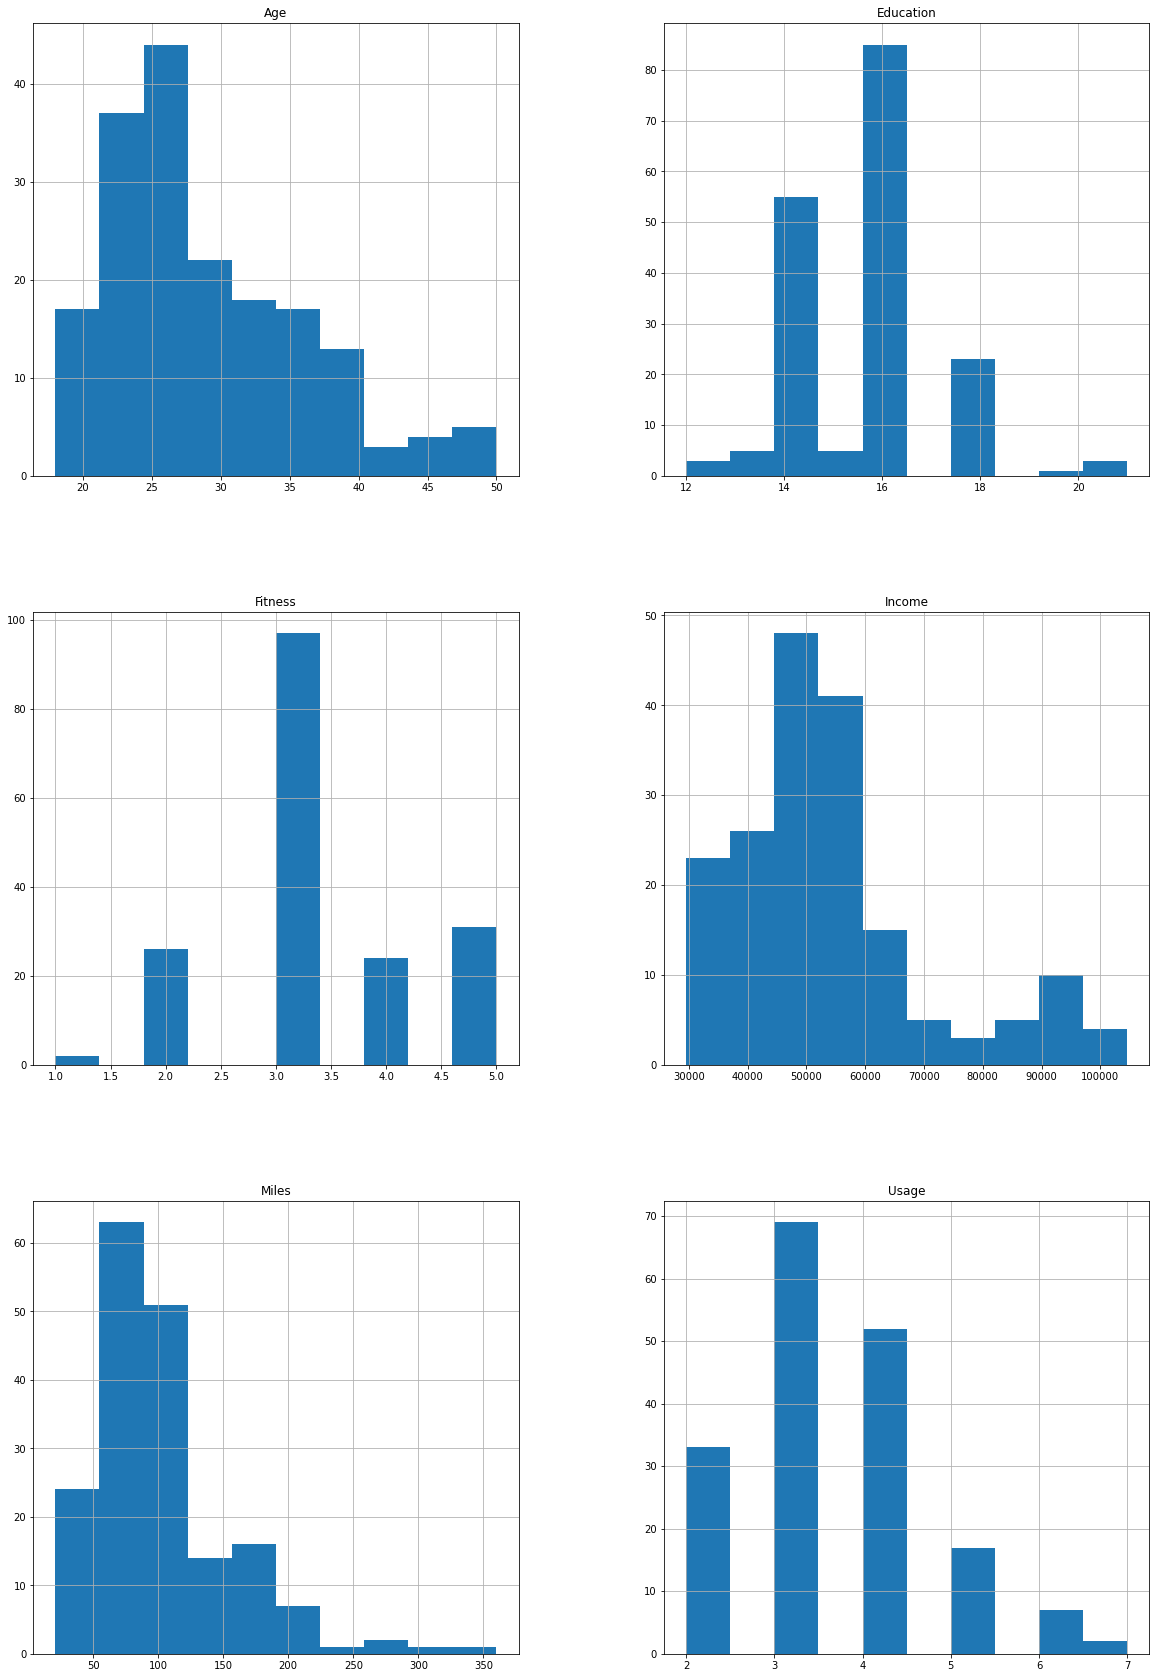

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(figsize=(20,30))

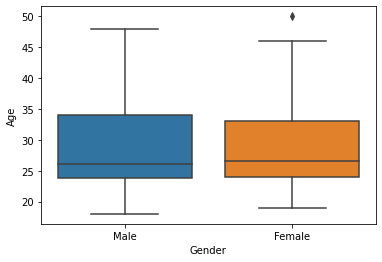

In [11]:
import seaborn as sk
sk.boxplot(x="Gender",y="Age",data=df)

In [12]:
# it means out of 80(TM195) Female use 40 and male use 40
# it means out of 60(TM498) Female use 29 and male use 31
pd.crosstab(df["Product"],df["Gender"])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [17]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [19]:
pd.crosstab(df["Product"],df["MaritalStatus"])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


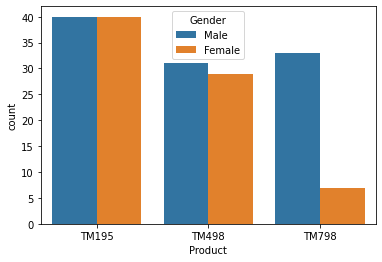

In [21]:
#uses of product
sk.countplot(x="Product",hue="Gender",data=df)

In [24]:
pd.pivot_table(df,index=['Product','Gender'],
                columns=['MaritalStatus'],aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [25]:
pd.pivot_table(df,'Income',index=['Product','Gender'],
                columns=['MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

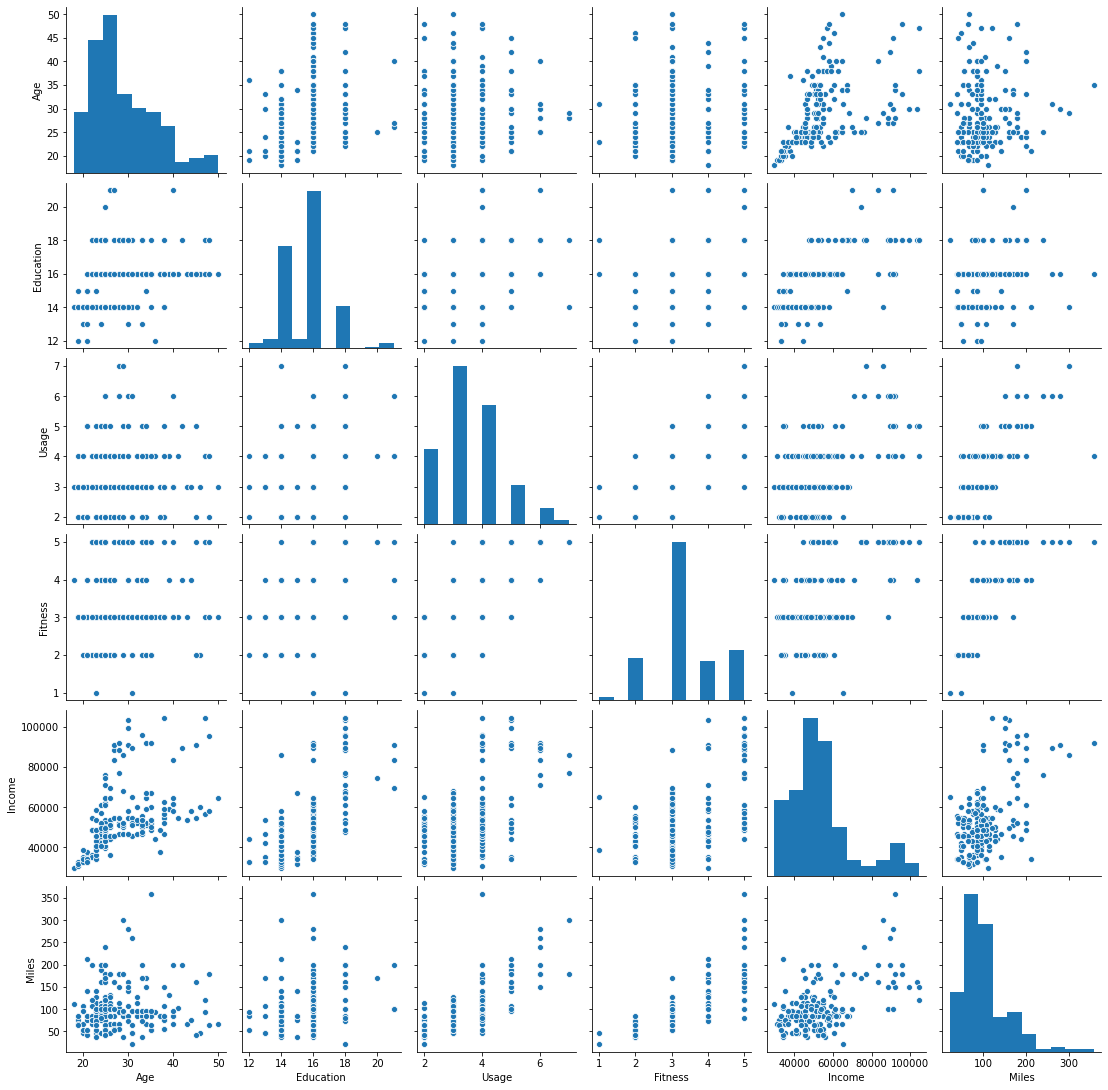

In [26]:
sk.pairplot(df)

In [27]:
df["Age"].std()

6.943498135399795

In [28]:
df["Age"].mean()

28.788888888888888

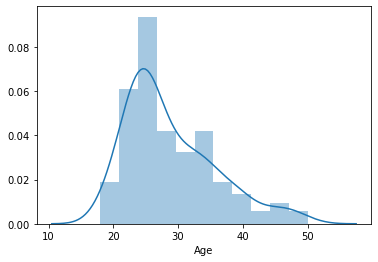

In [29]:
sk.distplot(df['Age'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0EC3B880>,
      dtype=object)

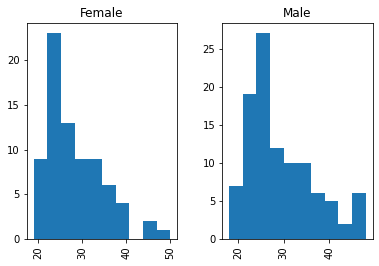

In [30]:
df.hist(by='Gender',column='Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0EBA8C58>,
      dtype=object)

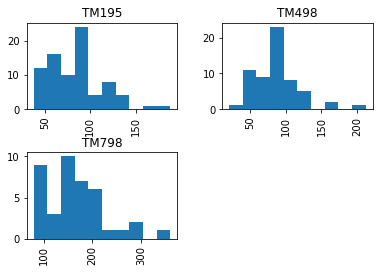

In [31]:
df.hist(by='Product',column='Miles')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0EC408F8>,
      dtype=object)

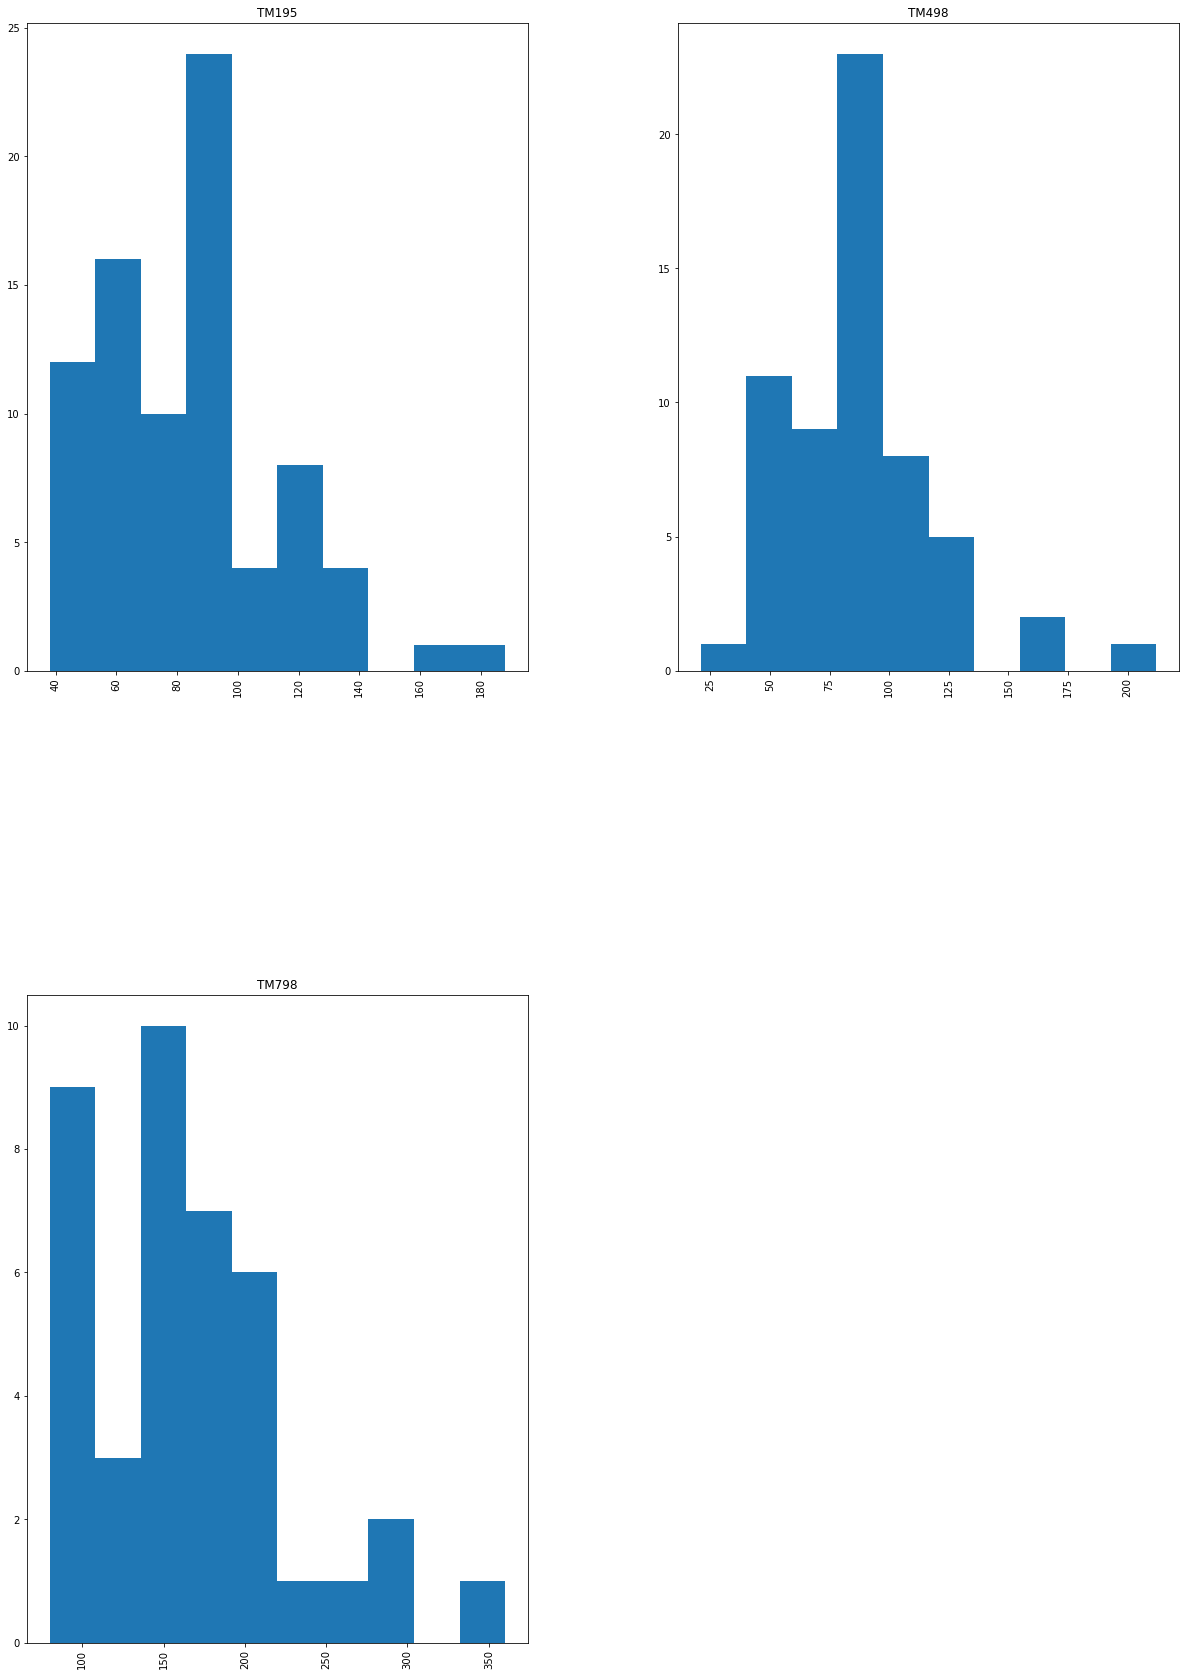

In [32]:
df.hist(by='Product',column='Miles',figsize=(20,30))

In [33]:
corr=df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [34]:
cov=df.cov()
cov

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


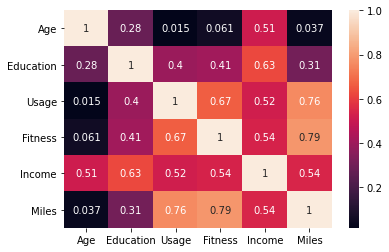

In [35]:
sk.heatmap(corr,annot=True)

In [37]:
#load fuction from sk learn
from sklearn import linear_model

#create linear Regression object
regr=linear_model.LinearRegression()

y=df['Miles']
x=df[['Usage','Fitness']]

#train the model
regr.fit(x,y)

LinearRegression()

In [38]:
regr.coef_

array([20.21486334, 27.20649954])

In [39]:
regr.intercept_

-56.74288178464862

In [ ]:
#MilesPredicated =-56.74+20.21*usage+27.20*Fitness 